# Churn Predict E-Commerce Dataset 

Pre-Processing : Split data - Label Encoding - Handling Missing Value

In [14]:
!pip install catboost
!pip install shap
!pip install feature_engine
!pip install openpyxl

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 kB 1.5 MB/s eta 0:00:00a 0:00:01


In [15]:
#Import ALL Package
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams

#Pre-Processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn import tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, balanced_accuracy_score
from sklearn.metrics import classification_report
from feature_engine.encoding import OneHotEncoder
from feature_engine.encoding import OrdinalEncoder

#Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import catboost as cb

#Feature Importance
import shap



In [8]:
#Data Visualization
sns.set_style('darkgrid')
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize': (20.7,8.27)})
sns.set_style("whitegrid")
sns.color_palette("dark")
plt.style.use("fivethirtyeight")

# STAGE 1


## Read Dataset


In [17]:
# Read Dataset
df = pd.read_excel('../input/ecommerce-customer-churn-analysis-and-prediction/E Commerce Dataset.xlsx', 'E Comm')
data = df
df.sample(5)

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
5588,55589,0,6.0,Phone,3,8.0,Credit Card,Male,4.0,5,Mobile Phone,4,Married,2,0,15.0,3.0,3.0,3.0,147.69
1076,51077,1,0.0,Phone,1,14.0,Credit Card,Male,3.0,4,Mobile Phone,3,Single,2,1,11.0,1.0,1.0,2.0,139.89
5396,55397,1,1.0,Mobile Phone,3,20.0,E wallet,Male,4.0,5,Laptop & Accessory,5,Married,7,1,14.0,2.0,3.0,3.0,186.34
175,50176,0,14.0,Mobile Phone,3,8.0,Debit Card,Male,2.0,3,Grocery,4,Single,2,0,19.0,1.0,NaN,4.0,260.15
3863,53864,0,10.0,Mobile Phone,1,12.0,Debit Card,Female,3.0,4,Fashion,5,Married,6,0,13.0,2.0,2.0,3.0,205.08


In [18]:
cats = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
nums = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
        'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount', 'CityTier', 'SatisfactionScore','Complain']

#memisahkan data tipe Kontinu(Interval)
kontinu_interval  = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered', 'NumberOfAddress',
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

#memisahkan data tipe Kategorikal(Ordinal dan Nominal)
kategorikal_ordinal = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
kategorikal_nominal = ['Churn', 'CityTier', 'SatisfactionScore','Complain']

## Descriptive Statistics

In [19]:
#Information general dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [20]:
#Check Missing Value
df.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

### Result 
1. There are missing values in several columns such as Tenure, WarehouseToHome, HourSpendOnApp, OrderAmountHikeFromlastYear, CouponUsed, OrderCount, DaySinceLastOrder
2. Overall The data type is already correct

In [22]:
#Check Statistics Summary numericals Data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [23]:
#Check Statistics Summary Catagorical Data
df[cats].describe()

,PreferredLoginDevice,PreferredPaymentMode,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630
unique,3,7,6,3
top,Mobile Phone,Debit Card,Laptop & Accessory,Married
freq,2765,2314,2050,2986


# Result 

1. From summary numericals data, does not appear any strange data. However, there are some skewed columns.
2. Columns Churn and Complain DataType Value is Boolean.
3. And From summary categoricals The unique number of column values is still reasonable, so there is nothing need to drop columns.

### Values Counting Data in Categoricals

In [28]:
for col in cats:
  print(f'''Value count Colums {col}:''')
  print(df[col].value_counts())
  print()

Value count Colums PreferredLoginDevice:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

Value count Colums PreferredPaymentMode:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

Value count Colums PreferedOrderCat:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

Value count Colums MaritalStatus:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64



## Univariate Analysis

### Individual Boxplot (Countinues_interval Data)

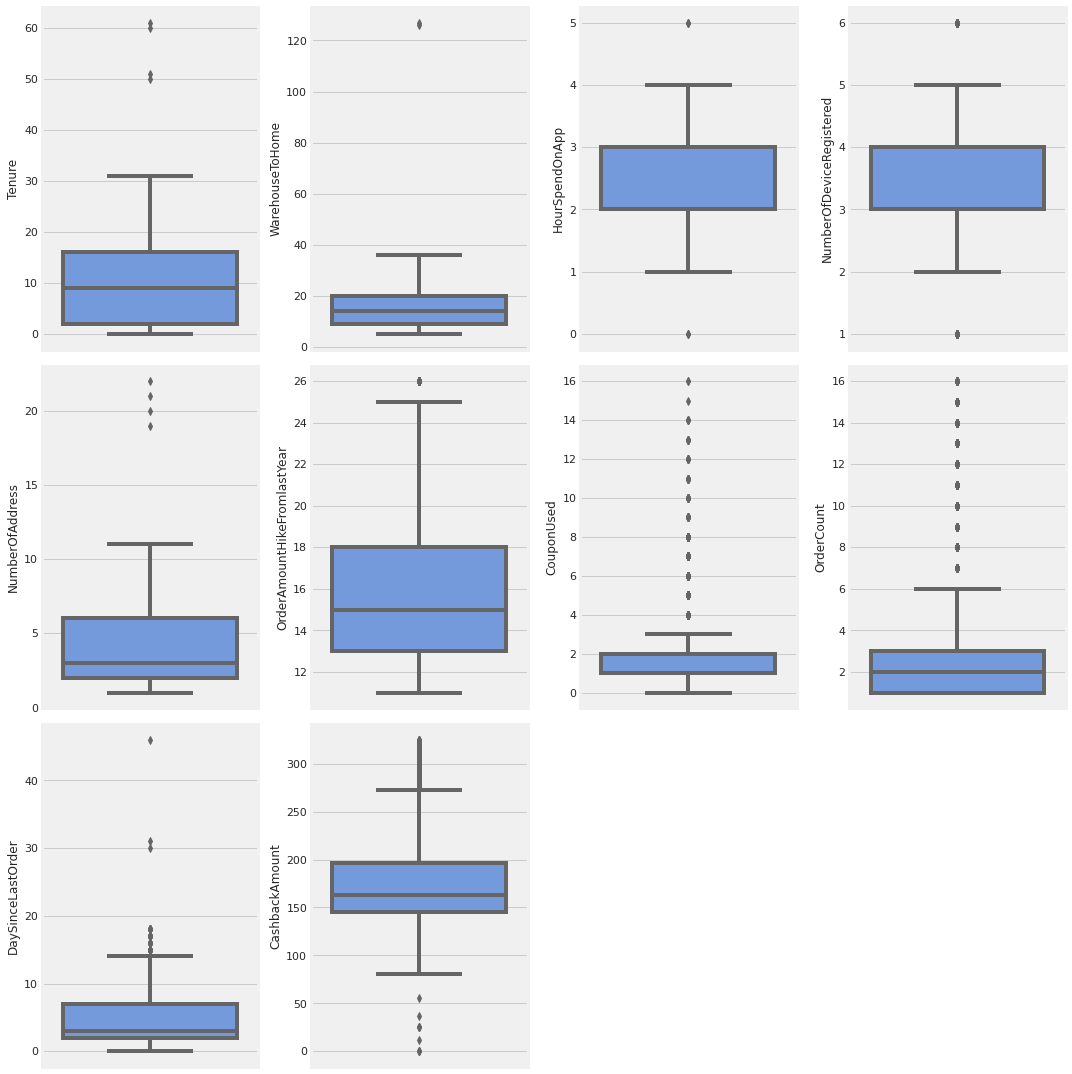

In [29]:
features = kontinu_interval
plt.figure(figsize=(15,20))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y=df[features[i]], color='cornflowerblue', orient='v')
  plt.tight_layout()

### Result 

1. From the boxplot visualization above, there are outliers that are very far away, namely in the column Tenure, WarehouseToHome, NumberOfAddress, dan DaySinceLastOrder.

2. And it is known that there is a column that is skewed to the right yaitu Tenure, WarehouseToHome, NumberOfAddress, CouponUsed, OrderCount, dan DaySinceLastOrder.

### Individual Displot (kontinu_interval)

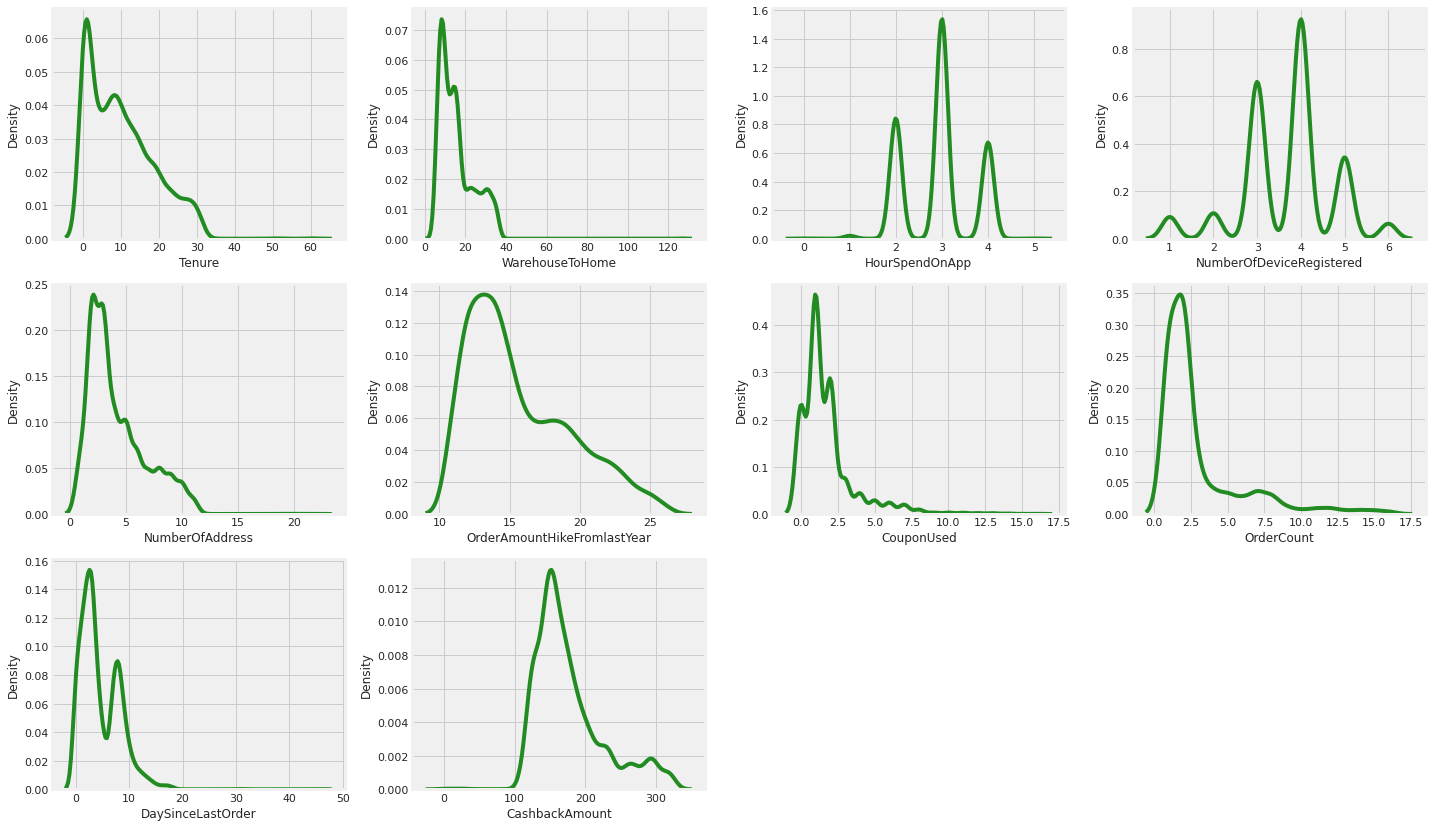

In [30]:
features = kontinu_interval
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(4, 4, i+1)
  sns.kdeplot(x=df[features[i]], color='forestgreen')
  plt.xlabel(features[i])
  plt.tight_layout()

### Result 

As you can see from visualization displot above: 

1. Columns `Tenure`, `WarehouseToHome`, `NumberOfAddress`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder` dan `CashbackAmount` has a graph that is skewed to the right (positively skewed) and when doing data preprocessing, you can perform feature transformation using log transformation.

2. Columns `NumberOfDeviceRegistered` shows customers tend to log in more than 1 device.

3. Columns `HourSpendOnAPP` have mode in 3 hours.

### Individual Countplot (kategorikal_ordinal)

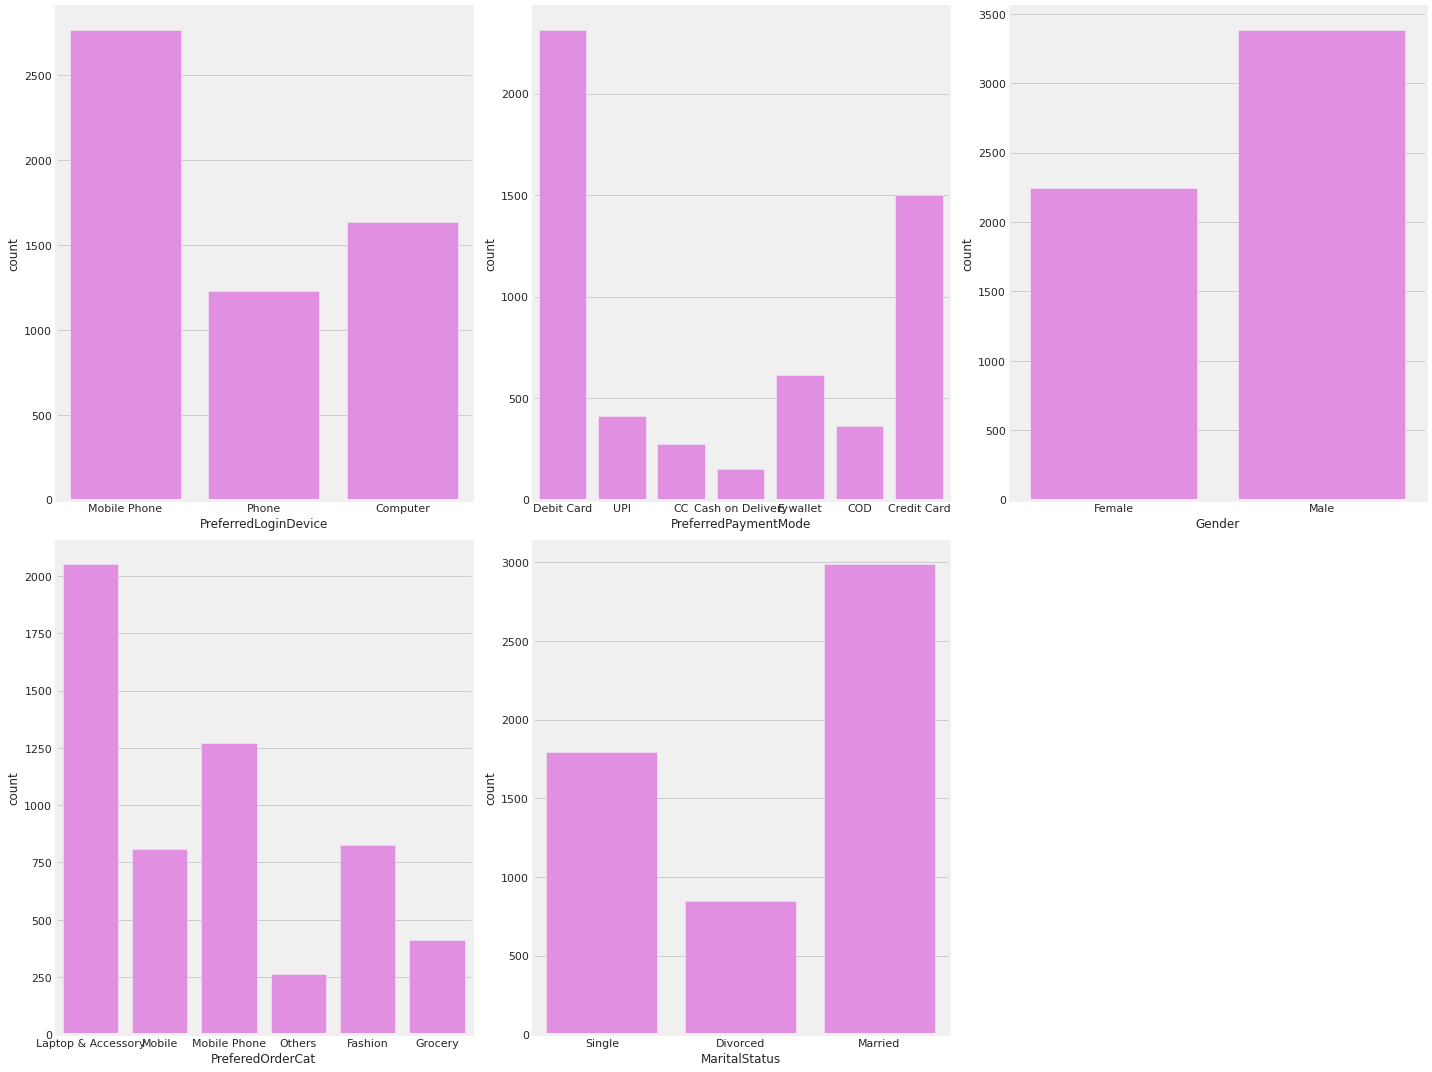

In [32]:
features = kategorikal_ordinal
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

### Result 

1. Columns PrefferedLoginDevice has a dominating value in the Mobile Phone category.
2. Columns PrefferedPaymentMode has a dominating value in the Mobile Phone 2 category yaitu Debit Card dan Credit Card.
3. Columns Gender has a dominating value is Male
4. Columns PreferedOrderCat has a dominating value is Laptop & Accessory
5. Columns MaritalStatus has a dominating value is Married


### Individual Countplot (kategorikal_numerikal)

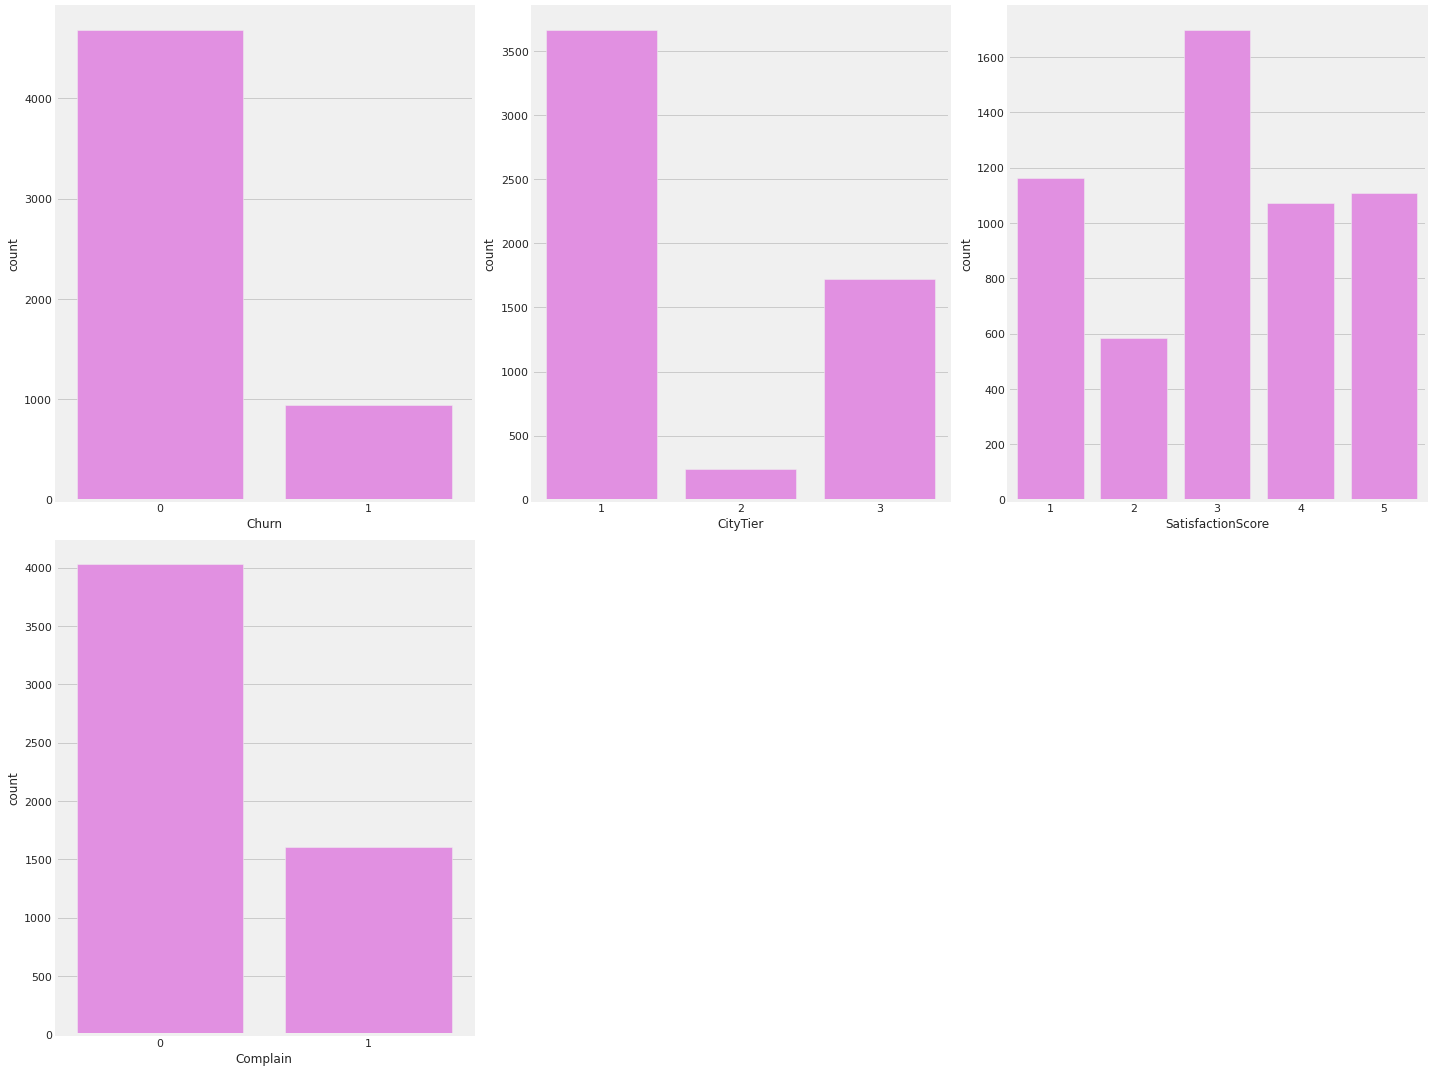

In [34]:
features = kategorikal_nominal
plt.figure(figsize=(20, 15))
for i in range(0, len(features)):
  plt.subplot(2, 3, i+1)
  sns.countplot(x=df[features[i]], color = 'violet')
  plt.tight_layout()

### Result

1. Columns `CityTier` shows that customers with category 1 dominate.
2. Columns `SatisfactionScore` has a dominating value on the number 3.

## Multivariate Analysis

### Correlation Heatmap (Numeric)

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. The values of the first dimension appear as the rows of the table while of the second dimension as a column. [Source](https://www.geeksforgeeks.org/how-to-create-a-seaborn-correlation-heatmap-in-python/#:~:text=A%20correlation%20heatmap%20is%20a,second%20dimension%20as%20a%20column.)

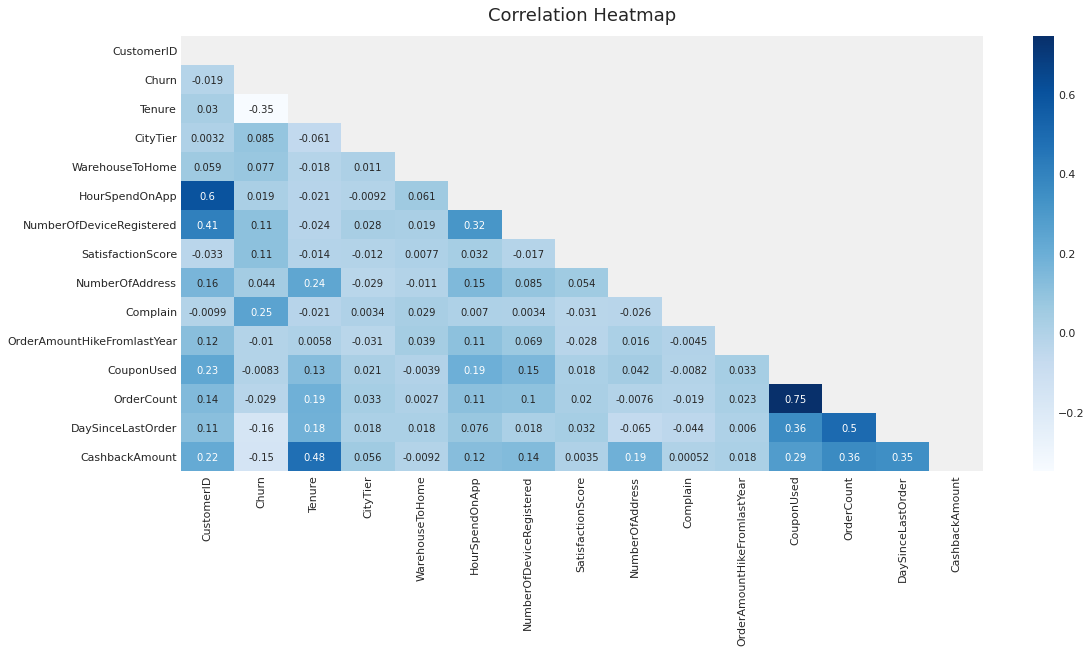

In [36]:
# Correlation Analysis
plt.figure(figsize=(16, 8))

# Create mask for diagonal correlation plot
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

# Plot the heatmap
heatmap = sns.heatmap(df.corr(), mask=mask, annot=True, cmap='Blues' )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

From the Correlation Heatmap above, it can be seen that: 

1. Target (Churn) has a Positive correlation with `CityTier`, `WarehouseToHome`, `NumberOfDeviceRegistered`, `SatisfactionScore`, `Complain`
2. Target (Churn) has a Negative correlation with `Tenure`,  `DaySinceLastOrder`, and `CashbackAmount`.
3. Target (Churn) with `HourSpendOnApp`,`NumberOfAddress`, `OrderAmoundHikeFromlastYear`, `CouponUsed`, `OrderCount` has correlation very weak ~0, this indicates that the feature may not have potential.
4. `OrderCount` has a Strong correlation with `CouponUsed`. It can be said redundant.

### Correlation between Targets and Features

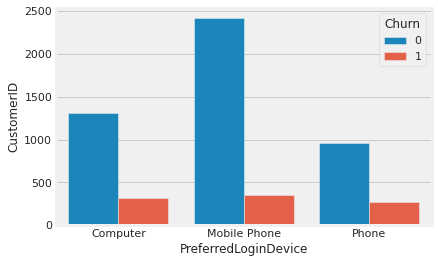

In [37]:
df9=df.groupby(['PreferredLoginDevice','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredLoginDevice', y ='CustomerID', hue='Churn', data=df9);

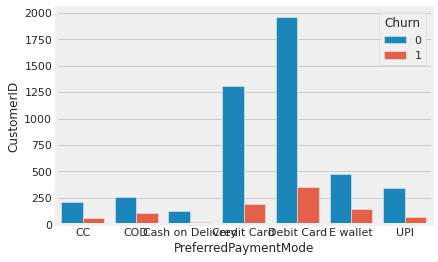

In [38]:
df10=df.groupby(['PreferredPaymentMode','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferredPaymentMode', y ='CustomerID', hue='Churn', data=df10);

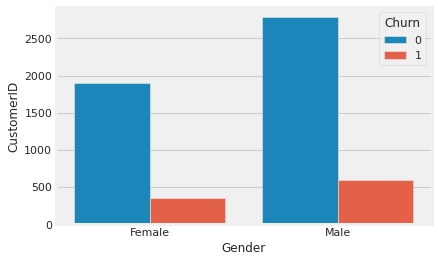

In [39]:
df11=df.groupby(['Gender','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='Gender', y ='CustomerID', hue='Churn', data=df11);

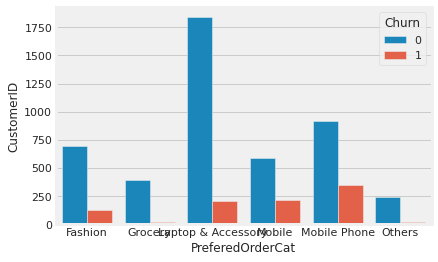

In [40]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12);

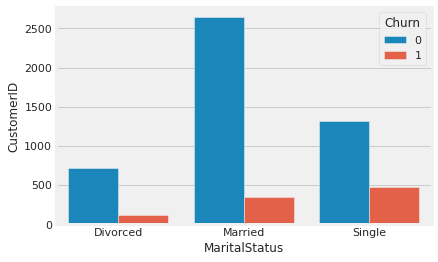

In [41]:
df13=df.groupby(['MaritalStatus','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='MaritalStatus', y ='CustomerID', hue='Churn', data=df13);

From the visualization above, it can be seen that:

1. Pada Fitur PreferredLoginDevice, Computer dan Mobile Phone have the highest churn potential.
2. Pada Fitur PreferredPaymentMode, Debit Card have the highest churn potential. 
3. Pada Fitur Gender, Male have the highest churn potential. 
4. Pada Fitur PreferredOrderCat, Mobile Phone have the highest churn potential.
5. Pada Fitur MaritalStatus, Single have the highest churn potential.

## Business Insight

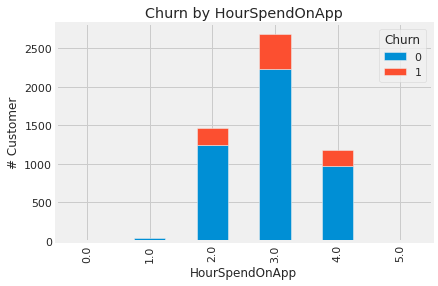

In [42]:
HourxChurn = pd.crosstab(data["HourSpendOnApp"], data["Churn"])
HourxChurn.plot(kind = 'bar', stacked = 'true', title = "Churn by HourSpendOnApp")
plt.xlabel('HourSpendOnApp')
plt.ylabel('# Customer')
plt.show()

In [44]:
df11_test = df.groupby(['HourSpendOnApp','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df11_test

,HourSpendOnApp,Churn,CustomerID
0,0.0,0,3
1,1.0,0,35
2,2.0,0,1239
3,2.0,1,232
4,3.0,0,2227
5,3.0,1,460
6,4.0,0,978
7,4.0,1,198
8,5.0,0,3


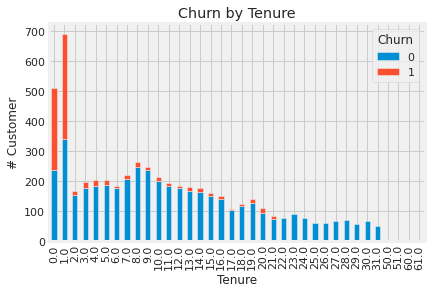

In [45]:
int_churn_contingency = pd.crosstab(data["Tenure"], data["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

### Business Insight 1. 

There is a fairly high correlation between customerID and HourSpendOnApp. However, Churn and HourSpendOnApp have a fairly weak correlation (below 0.05). This indicates that customers who open the App for a long time will not necessarily become buyers of the App. In contrast to Tenure, which has a fairly strong correlation. This means that the Marketing Team can focus on customers who have been using the App for a long time in providing promos so that they can retain old customers (you can say loyal customers). Because, a new customer can be said as a One Time Buyer.

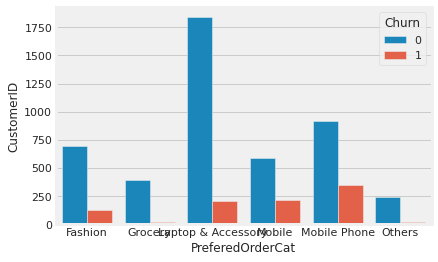

In [47]:
df12=df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
sns.barplot(x='PreferedOrderCat', y ='CustomerID', hue='Churn', data=df12);

In [48]:
df12_test = df.groupby(['PreferedOrderCat','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df12_test

,PreferedOrderCat,Churn,CustomerID
0,Fashion,0,698
1,Fashion,1,128
2,Grocery,0,390
3,Grocery,1,20
4,Laptop & Accessory,0,1840
5,Laptop & Accessory,1,210
6,Mobile,0,589
7,Mobile,1,220
8,Mobile Phone,0,921
9,Mobile Phone,1,350


### Business Insight 2. 

In giving promos, the Marketing Team must be right on target by adjusting to the behavior (shopping ability) of the customer. One example can be seen from PrefferedOrderCat. For example, customers who have the habit of buying Fashion products, can be given promos related to Fashion products. As for customers who have the habit of buying Laptop & Accessory products, promos related to Laptop & Accessory products can be given. It can reduce the chance for Churn

In [49]:
df14_test = df.groupby(['Complain','Churn']).agg({'CustomerID':'nunique'}).reset_index()
df14_test

,Complain,Churn,CustomerID
0,0,0,3586
1,0,1,440
2,1,0,1096
3,1,1,508


### Business Insight 3.

Judging from the heatmap correlation, the level of complaints still tends to be high. Therefore, the customer service team must monitor customer complaints on a regular basis so that they immediately follow up when they occur if customer complaints are handled properly, it is likely that customers will remain loyal to the Bukapedia application. In addition, customer complaints can also be an opportunity to improve products and services and can increase SatisfactionRate.

# Stage 2 - Pre-Processing

## Split-Data, And Why Split data??

The train-test split procedure is used to estimate the performance of machine learning algorithms when they are used to make predictions on data not used to train the model.

It is a fast and easy procedure to perform, the results of which allow you to compare the performance of machine learning algorithms for your predictive modeling problem. Although simple to use and interpret, there are times when the procedure should not be used, such as when you have a small dataset and situations where additional configuration is required, such as when it is used for classification and the dataset is not balanced.

In this tutorial, you will discover how to evaluate machine learning models using the train-test split. [Source](https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/)

In [51]:
#split dataset
x = df.drop(columns=['CustomerID','Churn'])
y = df['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Label_Encoding

In [52]:
def label_encoding(x_train,
                   x_test):
  ordinal_encoder = OrdinalEncoder(encoding_method='arbitrary',
variables='Gender')
  ordinal_encoder.fit(x_train)
  x_train = ordinal_encoder.transform(x_train)
  x_test = ordinal_encoder.transform(x_test)
  return x_train, x_test

In [53]:
x_train, x_test = label_encoding(x_train,x_test)

### One Hot Encoding

In [55]:
def label_ohe(x_train, 
              x_test):
  cat_features = ['PreferredLoginDevice', 'PreferredPaymentMode', 'PreferedOrderCat', 'MaritalStatus']
  ohe_encoder = OneHotEncoder(variables=cat_features)
  ohe_encoder.fit(x_train)
  x_train = ohe_encoder.transform(x_train)
  x_test = ohe_encoder.transform(x_test)

  return x_train, x_test

In [56]:
x_train , x_test=label_ohe(x_train, x_test)

In [57]:
#Result label endcoding
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4478,1.0,1,12.0,0,3.0,4,4,3,1,13.0,...,0,1,0,0,0,0,0,1,0,0
3685,17.0,1,13.0,0,4.0,5,3,3,1,15.0,...,0,0,1,0,0,0,0,1,0,0
731,0.0,1,9.0,1,NaN,4,3,2,0,12.0,...,0,0,0,1,0,0,0,1,0,0
291,NaN,1,8.0,1,2.0,3,2,2,1,23.0,...,0,1,0,0,0,0,0,0,1,0
184,4.0,1,11.0,1,2.0,3,2,1,1,12.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,1,4.0,4,3,2,0,15.0,...,0,0,1,0,0,0,0,1,0,0
5191,10.0,3,16.0,1,3.0,4,1,6,0,12.0,...,0,0,0,0,1,0,0,0,0,1
5226,7.0,1,11.0,0,3.0,5,4,10,0,12.0,...,0,1,0,0,0,0,0,0,0,1
5390,1.0,1,36.0,1,4.0,4,5,3,0,14.0,...,0,1,0,0,0,0,0,0,0,1


### Handling Missing Value And Imputation

In [59]:
cat_features = ['Tenure','WarehouseToHome','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder']
cont_features = ['HourSpendOnApp']

In [60]:
def imputation (x_train, 
                x_test,
                cont_features,
                cat_features,
                cont_strategy = 'median',
                cat_strategy = 'most_frequent'
                ):

#initializa object imputer
  imputerCat = SimpleImputer(missing_values=np.nan, strategy= cat_strategy)
  imputerCont = SimpleImputer(missing_values=np.nan, strategy= cont_strategy)

#fit to data train
  imputerCont.fit(x_train[cont_features])
  imputerCat.fit(x_train[cat_features])

#transfrom to data train
  x_train[cont_features] = imputerCont.transform(x_train[cont_features])
  x_train[cat_features] = imputerCat.transform(x_train[cat_features])
  x_test[cont_features] = imputerCont.transform(x_test[cont_features])
  x_test[cat_features] = imputerCat.transform(x_test[cat_features])

  return x_train, x_test

In [61]:
x_train , x_test = imputation(x_train, x_test,cont_features, cat_features)

In [62]:
x_train

,Tenure,CityTier,WarehouseToHome,Gender,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_CC,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Others,MaritalStatus_Single,MaritalStatus_Divorced,MaritalStatus_Married
4478,1.0,1,12.0,0,3.0,4,4,3,1,13.0,...,0,1,0,0,0,0,0,1,0,0
3685,17.0,1,13.0,0,4.0,5,3,3,1,15.0,...,0,0,1,0,0,0,0,1,0,0
731,0.0,1,9.0,1,3.0,4,3,2,0,12.0,...,0,0,0,1,0,0,0,1,0,0
291,1.0,1,8.0,1,2.0,3,2,2,1,23.0,...,0,1,0,0,0,0,0,0,1,0
184,4.0,1,11.0,1,2.0,3,2,1,1,12.0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3772,1.0,1,27.0,1,4.0,4,3,2,0,15.0,...,0,0,1,0,0,0,0,1,0,0
5191,10.0,3,16.0,1,3.0,4,1,6,0,12.0,...,0,0,0,0,1,0,0,0,0,1
5226,7.0,1,11.0,0,3.0,5,4,10,0,12.0,...,0,1,0,0,0,0,0,0,0,1
5390,1.0,1,36.0,1,4.0,4,5,3,0,14.0,...,0,1,0,0,0,0,0,0,0,1


# Stage 3 - Modeling

### Function Modeling

In [64]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def get_metrics(y_pred, y_act, model_name):
  recall =  recall_score(y_act, y_pred)
  precision = precision_score(y_act, y_pred)
  roc_auc = roc_auc_score(y_act, y_pred)
  f1 = f1_score(y_act, y_pred)
  accuracy = balanced_accuracy_score(y_act, y_pred)

  metrics_result = dict(model_name=model_name, 
                        recall=recall, 
                        precision=precision, 
                        roc_auc=roc_auc, 
                        f1=f1,
                        accuracy=accuracy)
  
  return metrics_result


def prediction(x_train, y_train, x_test, y_test, clf, model_name='decision tree'):
  
  clf = clf
  clf.fit(x_train, y_train)
  y_test_pred = clf.predict(x_test)
  y_train_pred = clf.predict(x_train)


  result = dict()
  test_result = get_metrics(y_pred=y_test_pred, y_act=y_test, model_name=model_name)
  train_result = get_metrics(y_pred=y_train_pred, y_act=y_train, model_name=model_name)

  result['test'] = test_result
  result['train'] = train_result
  result['y_test'] = y_test
  result['y_test_pred'] = y_test_pred
  result['y_train'] = y_train
  result['y_train_pred'] = y_train_pred
  result['clf'] = clf
  result['x_train'] = x_train
  result['x_test'] = x_test

  del clf

  return result
  
def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')


## Prediction Evaluation

In [65]:
model_1_result = prediction(x_train, y_train, x_test, y_test, tree.DecisionTreeClassifier(), model_name='decision tree')
model_2_result = prediction(x_train, y_train, x_test, y_test, xgb.XGBClassifier(random_state=42), model_name='xgboost')
model_3_result = prediction(x_train, y_train, x_test, y_test, cb.CatBoostClassifier(random_state=42, logging_level='Silent'), model_name='catboost')
model_4_result = prediction(x_train, y_train, x_test, y_test, LogisticRegression(), model_name='logistic regression')
model_5_result = prediction(x_train, y_train, x_test, y_test, RandomForestClassifier(random_state=42), model_name='random forest')
model_6_result = prediction(x_train, y_train, x_test, y_test, KNeighborsClassifier(), model_name='kNN')
model_7_result = prediction(x_train, y_train, x_test, y_test, AdaBoostClassifier(random_state=42), model_name='adaboost')

## Result Modeling

### TRAIN

In [66]:
pd.DataFrame([model_1_result['train'], 
              model_2_result['train'], 
              model_3_result['train'], 
              model_4_result['train'], 
              model_5_result['train'],
              model_6_result['train'], 
              model_7_result['train']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,1.000000,1.000000,1.000000,1.000000,1.000000
1,xgboost,1.000000,1.000000,1.000000,1.000000,1.000000
2,catboost,0.959371,0.997275,0.979418,0.977956,0.979418
3,logistic regression,0.520315,0.724453,0.739976,0.605645,0.739976
4,random forest,1.000000,1.000000,1.000000,1.000000,1.000000
5,kNN,0.557012,0.792910,0.763670,0.654349,0.763670
6,adaboost,0.589777,0.756303,0.775509,0.662739,0.775509


### TEST

In [67]:
pd.DataFrame([model_1_result['test'], 
              model_2_result['test'], 
              model_3_result['test'], 
              model_4_result['test'], 
              model_5_result['test'],
              model_6_result['test'], 
              model_7_result['test']])

,model_name,recall,precision,roc_auc,f1,accuracy
0,decision tree,0.881081,0.931429,0.934164,0.905556,0.934164
1,xgboost,0.918919,0.982659,0.957865,0.949721,0.957865
2,catboost,0.816216,0.974194,0.905983,0.888235,0.905983
3,logistic regression,0.551351,0.796875,0.761861,0.651757,0.761861
4,random forest,0.827027,1.000000,0.913514,0.905325,0.913514
5,kNN,0.400000,0.627119,0.676621,0.488449,0.676621
6,adaboost,0.616216,0.808511,0.793762,0.699387,0.793762


In [68]:
print(classification_report(model_1_result['y_test'], model_5_result['y_test_pred']))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       941
           1       1.00      0.83      0.91       185

    accuracy                           0.97      1126
   macro avg       0.98      0.91      0.94      1126
weighted avg       0.97      0.97      0.97      1126



## Hyperparameter Tuning

Hyperparameter tuning is an essential part of controlling the behavior of a machine learning model. If we don’t correctly tune our hyperparameters, our estimated model parameters produce suboptimal results, as they don’t minimize the loss function. This means our model makes more errors. In practice, key indicators like the accuracy or the confusion matrix will be worse. [Source](https://www.anyscale.com/blog/what-is-hyperparameter-tuning)

### Hyperparameter LogisticRegression

In [70]:
model = LogisticRegression()
model.fit(x_train, y_train)
print('Train score: ' + str(model.score(x_train, y_train))) #accuracy
print('Test score:' + str(model.score(x_test, y_test))) #accuracy

Train score: 0.8852131438721137
Test score:0.9031971580817052


In [71]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# List Hyperparameters yang akan diuji
penalty = ['l2','l1','elasticnet']
C = [0.0001, 0.001, 0.002] # Inverse of regularization strength; smaller values specify stronger regularization.
hyperparameters = dict(penalty=penalty, C=C)

# Inisiasi model
logres = LogisticRegression(random_state=42) # Init Logres dengan Gridsearch, cross validation = 5
model = RandomizedSearchCV(logres, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fitting Model & Evaluation
logres_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='logistic regression_hyperparam')

In [72]:
print('Best algorithm:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best algorithm: l2
Best C: 0.002


In [73]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score: ' + str(model.score(x_test, y_test))) #recall

Train score: 0.2699868938401048
Test score: 0.2648648648648649


### Hyperparameter KKN

In [74]:
model = KNeighborsClassifier()
model.fit(x_train, y_train)
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score:' + str(model.score(x_test, y_test))) #recall

Train score: 0.9003108348134992
Test score:0.8623445825932504


In [75]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,30))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

# Init model
knn = KNeighborsClassifier()
model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='recall')

# Fit Model & Evaluasi
kkn_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='kNN_hyperparam')

In [76]:
print('Best n_neighbors:', model.best_estimator_.get_params()['n_neighbors'])
print('Best p:', model.best_estimator_.get_params()['p'])
print('Best algorithm:', model.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 1
Best algorithm: ball_tree


In [77]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score: ' + str(model.score(x_test, y_test))) #recall

Train score: 0.5871559633027523
Test score: 0.4486486486486487


### Hyperparameter DecisionTreeClassifier

In [79]:
model = tree.DecisionTreeClassifier() 
model.fit(x_train,y_train)
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score:' + str(model.score(x_test, y_test))) #recall

Train score: 1.0
Test score:0.9742451154529307


In [80]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = tree.DecisionTreeClassifier()
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='recall')
model.fit(x_train, y_train)

# Predict & Evaluation
dt_hyper = prediction(x_train, y_train, x_test, y_test, model, model_name='decision tree_hyperparam')
dt_hyper

{'test': {'model_name': 'decision tree_hyperparam',
  'recall': 0.6648648648648648,
  'precision': 0.7592592592592593,
  'roc_auc': 0.8117097969382773,
  'f1': 0.7089337175792507,
  'accuracy': 0.8117097969382773},
 'train': {'model_name': 'decision tree_hyperparam',
  'recall': 0.8125819134993447,
  'precision': 0.9144542772861357,
  'roc_auc': 0.8985390187651763,
  'f1': 0.8605135322692575,
  'accuracy': 0.8985390187651763},
 'y_test': 4331    1
 1988    0
 3443    0
 4559    0
 4898    0
        ..
 3740    0
 833     0
 4441    0
 4490    0
 2842    0
 Name: Churn, Length: 1126, dtype: int64,
 'y_test_pred': array([1, 0, 0, ..., 0, 0, 0]),
 'y_train': 4478    0
 3685    0
 731     0
 291     0
 184     0
        ..
 3772    0
 5191    1
 5226    0
 5390    0
 860     1
 Name: Churn, Length: 4504, dtype: int64,
 'y_train_pred': array([0, 0, 0, ..., 0, 1, 1]),
 'clf': RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                    param_distributions={'max_depth': [1

In [81]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [82]:
print('Train score: ' + str(model.score(x_train, y_train))) #recall
print('Test score: ' + str(model.score(x_test, y_test))) #recall

Train score: 0.8125819134993447
Test score: 0.6648648648648648


### Hyperparameter Random Forest

In [83]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)
print('Train score: ' + str(rf.score(x_train, y_train))) #recall
print('Test score: ' + str(rf.score(x_test, y_test))) #recall

Train score: 1.0
Test score: 0.9715808170515098


In [84]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree 
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(10, 110, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
rf_hyper = prediction(x_train, y_train, x_test, y_test, rf_tuned, model_name='random forest_hyperparam')
rf_hyper

{'test': {'model_name': 'random forest_hyperparam',
  'recall': 0.7945945945945946,
  'precision': 1.0,
  'roc_auc': 0.8972972972972972,
  'f1': 0.8855421686746988,
  'accuracy': 0.8972972972972972},
 'train': {'model_name': 'random forest_hyperparam',
  'recall': 0.9960681520314548,
  'precision': 1.0,
  'roc_auc': 0.9980340760157274,
  'f1': 0.9980302035456337,
  'accuracy': 0.9980340760157274},
 'y_test': 4331    1
 1988    0
 3443    0
 4559    0
 4898    0
        ..
 3740    0
 833     0
 4441    0
 4490    0
 2842    0
 Name: Churn, Length: 1126, dtype: int64,
 'y_test_pred': array([1, 0, 0, ..., 0, 0, 0]),
 'y_train': 4478    0
 3685    0
 731     0
 291     0
 184     0
        ..
 3772    0
 5191    1
 5226    0
 5390    0
 860     1
 Name: Churn, Length: 4504, dtype: int64,
 'y_train_pred': array([0, 0, 0, ..., 0, 0, 1]),
 'clf': RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                    param_distributions={'bootstrap': [True],
         

In [85]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 110
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


In [86]:
print('Train score: ' + str(rf_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(rf_tuned.score(x_test, y_test))) #recall

Train score: 0.9960681520314548
Test score: 0.7945945945945946


### Hyperparameter AdaBoost

In [87]:
ab = AdaBoostClassifier(random_state=42)
ab.fit(x_train,y_train)
print('Train score: ' + str(ab.score(x_train, y_train))) #recall
print('Test score: ' + str(ab.score(x_test, y_test))) #recall

Train score: 0.8983126110124334
Test score: 0.9129662522202486


In [88]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
ad_hyper = prediction(x_train, y_train, x_test, y_test, ab_tuned, model_name='adaboost_hyperparam')

In [89]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1700
Best learning_rate: 0.07394736842105264
Best algorithm: SAMME.R


In [90]:
print('Train score: ' + str(ab_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(ab_tuned.score(x_test, y_test))) #recall

Train score: 0.5950196592398427
Test score: 0.6216216216216216


### Hyperparameter CatBoost

In [91]:
cat = cb.CatBoostClassifier(random_state=42, logging_level='Silent')
cat.fit(x_train,y_train)
print('Train score: ' + str(cat.score(x_train, y_train))) #recall
print('Test score: ' + str(cat.score(x_test, y_test))) #recall

Train score: 0.9926731793960923
Test score: 0.9662522202486679


In [92]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)]
                      )

# Init model
cat = cb.CatBoostClassifier(random_state=42,logging_level='Silent')
cat_tuned = RandomizedSearchCV(cat, hyperparameters, random_state=42, cv=5, scoring='recall')

# Predict & Evaluation
cat_hyper = prediction(x_train, y_train, x_test, y_test, cat_tuned, model_name='cat boost_hyperparam')

In [93]:
show_best_hyperparameter(cat_tuned.best_estimator_, hyperparameters)

Best n_estimators: 1000
Best learning_rate: 0.08436842105263158


In [94]:
print('Train score: ' + str(cat_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(cat_tuned.score(x_test, y_test))) #recall

Train score: 1.0
Test score: 0.9351351351351351


### Hyperparameter XGBOOST

In [95]:
xg = xgb.XGBClassifier(random_state=42)
xg.fit(x_train, y_train)
print('Train score: ' + str(xg.score(x_train, y_train))) #recall
print('Test score: ' + str(xg.score(x_test, y_test))) #recall

Train score: 1.0
Test score: 0.9840142095914742


In [97]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = xgb.XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='recall')

# Predict & Evaluation
xg_hyper = prediction(x_train, y_train, x_test, y_test, xg_tuned, model_name='xgboost_hyperparam')

In [98]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 110
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


In [99]:
print('Train score: ' + str(xg_tuned.score(x_train, y_train))) #recall
print('Test score: ' + str(xg_tuned.score(x_test, y_test))) #recall

Train score: 0.9947575360419397
Test score: 0.8594594594594595


## Result Hyperparameter modeling

In [100]:
pd.DataFrame([logres_hyper['train'], 
              kkn_hyper['train'], 
              dt_hyper['train'], 
              rf_hyper['train'], 
              ad_hyper['train'],
              cat_hyper['train'],
              xg_hyper['train']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,logistic regression_hyperparam,0.269987,0.786260,0.627509,0.401951,0.627509
1,kNN_hyperparam,0.587156,0.825046,0.780881,0.686064,0.780881
2,decision tree_hyperparam,0.812582,0.914454,0.898539,0.860514,0.898539
3,random forest_hyperparam,0.996068,1.000000,0.998034,0.998030,0.998034
4,adaboost_hyperparam,0.595020,0.769492,0.779333,0.671101,0.779333
5,cat boost_hyperparam,1.000000,1.000000,1.000000,1.000000,1.000000
6,xgboost_hyperparam,0.994758,0.998684,0.997245,0.996717,0.997245


In [101]:
pd.DataFrame([logres_hyper['test'], 
              kkn_hyper['test'], 
              dt_hyper['test'], 
              rf_hyper['test'], 
              ad_hyper['test'],
              cat_hyper['test'],
              xg_hyper['test']
              ])

,model_name,recall,precision,roc_auc,f1,accuracy
0,logistic regression_hyperparam,0.264865,0.844828,0.627650,0.403292,0.627650
1,kNN_hyperparam,0.448649,0.697479,0.705196,0.546053,0.705196
2,decision tree_hyperparam,0.664865,0.759259,0.811710,0.708934,0.811710
3,random forest_hyperparam,0.794595,1.000000,0.897297,0.885542,0.897297
4,adaboost_hyperparam,0.621622,0.827338,0.798058,0.709877,0.798058
5,cat boost_hyperparam,0.935135,0.994253,0.967036,0.963788,0.967036
6,xgboost_hyperparam,0.859459,0.969512,0.927073,0.911175,0.927073


From these results, the Catboost model with hyperparameters is the best model with 100% train and 93% test.

## Feature Importance

Feature Importance refers to techniques that calculate a score for all the input features for a given model — the scores simply represent the “importance” of each feature. A higher score means that the specific feature will have a larger effect on the model that is being used to predict a certain variable. [Source](https://towardsdatascience.com/understanding-feature-importance-and-how-to-implement-it-in-python-ff0287b20285)

In [102]:
# model interpretation CatBoost

explainer = shap.Explainer(cat_hyper['clf'].predict, cat_hyper['x_test'])
shap_values_cat = explainer(cat_hyper['x_test'])

Permutation explainer: 1127it [01:24, 12.17it/s]                          


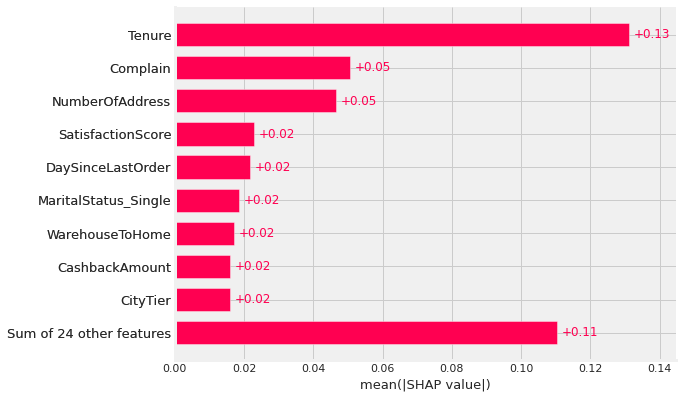

In [103]:
shap.plots.bar(shap_values_cat)

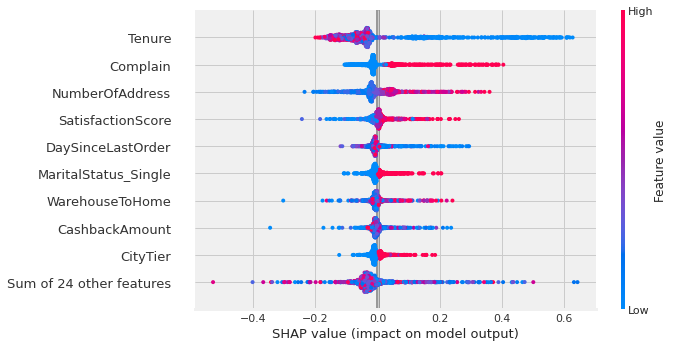

In [104]:
shap.plots.beeswarm(shap_values_cat)

## Confusion Matrix

A confusion matrix is a table that is used to define the performance of a classification algorithm. A confusion matrix visualizes and summarizes the performance of a classification algorithm. 

Better the effectiveness, better the performance, and that is exactly what we want. And it is where the Confusion matrix comes into the limelight. Confusion Matrix is a performance measurement for machine learning classification.[Source](https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62)

In [106]:
# Catboost
y_pred = cat_tuned.predict(x_test)
y_pred_train = cat_tuned.predict(x_train)

In [107]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[940   1]
 [ 12 173]]


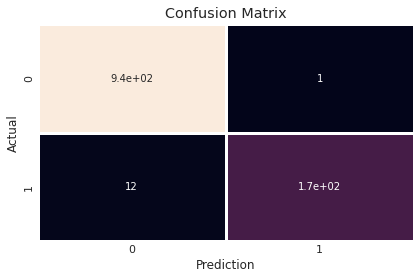

In [108]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

In [109]:
#Confusion Matrix Train
cf_matrix1 = confusion_matrix(y_train, y_pred_train)

print(cf_matrix1)

[[3741    0]
 [   0  763]]


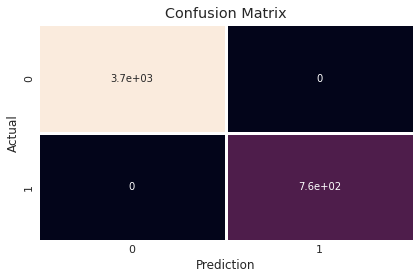

In [110]:
sns.heatmap(confusion_matrix(y_train,y_pred_train),annot=True,linewidths=3,cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Prediction')
plt.show()

## Top Feature Insight

Our group decided to choose the Catboost model as the predicted model. When viewed from the importance score feature of the Catboost model, several features that become important predictors are the Tenure, Complain, NumberOfAddress, DaySinceLastOrder, and MaritalStatus_Single features.

Here are some insights from these features:

### 1. Tenure

In [111]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

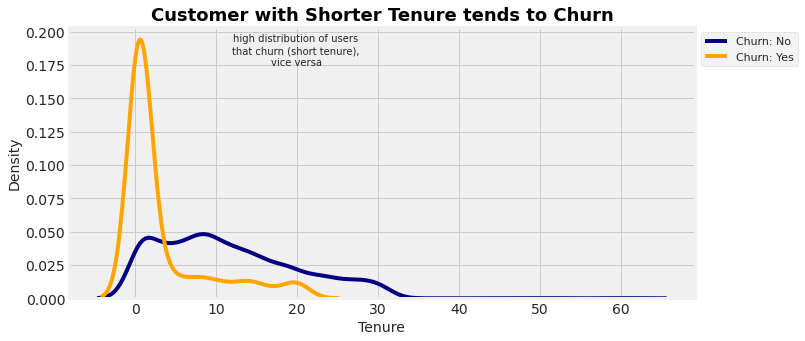

In [112]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.kdeplot(df[df['Churn'] == 0]['Tenure'].dropna(), color= 'navy', label= 'Churn: No', ax=ax)
sns.kdeplot(df[df['Churn'] == 1]['Tenure'].dropna(), color= 'orange', label= 'Churn: Yes', ax=ax)

ax.set_title('Customer with Shorter Tenure tends to Churn',color='black',fontsize=18,fontweight='bold')
ax.set_ylabel('Density', fontsize=14) # y axis label
ax.set_xlabel('Tenure', fontsize=14) # x axis label
plt.tick_params(axis = 'both', which = 'major', labelsize = 14)
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1)


ax.annotate('high distribution of users \nthat churn (short tenure), \nvice versa', 
            xy=(2, 0.2), xytext=(20, 0.175), arrowprops=dict(facecolor='steelblue',arrowstyle="->",connectionstyle="arc3,rad=.3"),
           ha='center');

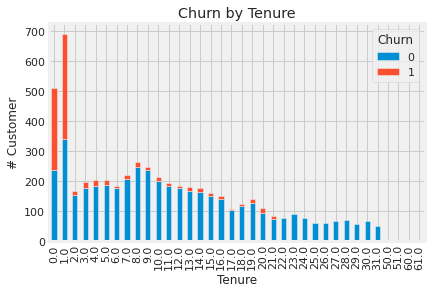

In [114]:
int_churn_contingency = pd.crosstab(data["Tenure"], data["Churn"])
int_churn_contingency.plot(kind = 'bar', stacked = 'true', title = "Churn by Tenure")
int_churn_contingency
plt.xlabel('Tenure')
plt.ylabel('# Customer')
plt.show()

**Insight :**

Customers with low tenure (first 2 months) have a much higher potential for churn than those with upper middle tenure.

**business recommendation :**

Provide promotions to customers with tenure < 2 months. The promo can be in the form of a Coupon so that customers can continue to survive and return to shopping in e-commerce. In addition, handling complaints can also help get royal customers

### 2. Complain

In [115]:
group_by_complain = df.groupby(['PreferedOrderCat','Complain']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})

group_by_complain2 = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
group_by_complain3 = group_by_complain.merge(group_by_complain2, how='left',
              on='PreferedOrderCat')

group_by_complain3.columns = ['PreferedOrderCat','Complain','Num_Customer','AllCustomer']
group_by_complain3['Ratio'] = (group_by_complain3['Num_Customer'] / group_by_complain3['AllCustomer'] * 100.0).round(2)
group_by_complain3

,PreferedOrderCat,Complain,Num_Customer,AllCustomer,Ratio
0,Fashion,Not Complain,584,826,70.70
1,Fashion,Complain,242,826,29.30
2,Grocery,Not Complain,284,410,69.27
3,Grocery,Complain,126,410,30.73
4,Laptop & Accessory,Not Complain,1492,2050,72.78
5,Laptop & Accessory,Complain,558,2050,27.22
6,Mobile,Not Complain,573,809,70.83
7,Mobile,Complain,236,809,29.17
8,Mobile Phone,Not Complain,897,1271,70.57
9,Mobile Phone,Complain,374,1271,29.43


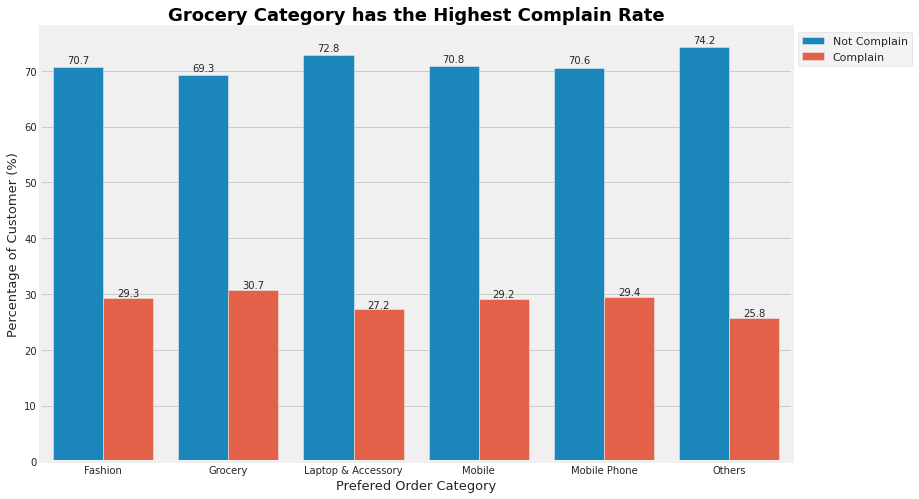

In [116]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=group_by_complain3, x='PreferedOrderCat', y='Ratio', hue='Complain')
plt.title('Grocery Category has the Highest Complain Rate', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

In [117]:
churn_by_complain = df.groupby(['Churn','Complain']).agg({'CustomerID':'nunique'}).reset_index()
churn_by_complain['Complain'] = group_by_complain['Complain'].replace({1:'Complain',
                                                                0:'Not Complain'})
churn_by_complain

,Churn,Complain,CustomerID
0,0,Not Complain,3586
1,0,Complain,1096
2,1,Not Complain,440
3,1,Complain,508


**Insight**

The percentage of churn due to customer complaints (31.67%) is almost 3 times greater than the percentage of total churn of customers who do not complain (10.93%).

**business recommendation**

Prioritizing customer satisfaction by dividing customers into 2, namely: Priority Customers (customers complain and have the potential to churn) and Regular Customers.


### 3. OrderCategory

In [118]:
df12_new = df.groupby(['PreferedOrderCat']).agg({'CustomerID':'nunique'}).reset_index()
df12_new1 = df12.merge(df12_new, how='left',
              on='PreferedOrderCat')

df12_new1.columns = ['PreferedOrderCat','Churn','Num_Customer','AllCustomer']
df12_new1['Ratio'] = (df12_new1['Num_Customer'] / df12_new1['AllCustomer'] * 100.0).round(2)
df12_new1

,PreferedOrderCat,Churn,Num_Customer,AllCustomer,Ratio
0,Fashion,0,698,826,84.50
1,Fashion,1,128,826,15.50
2,Grocery,0,390,410,95.12
3,Grocery,1,20,410,4.88
4,Laptop & Accessory,0,1840,2050,89.76
5,Laptop & Accessory,1,210,2050,10.24
6,Mobile,0,589,809,72.81
7,Mobile,1,220,809,27.19
8,Mobile Phone,0,921,1271,72.46
9,Mobile Phone,1,350,1271,27.54


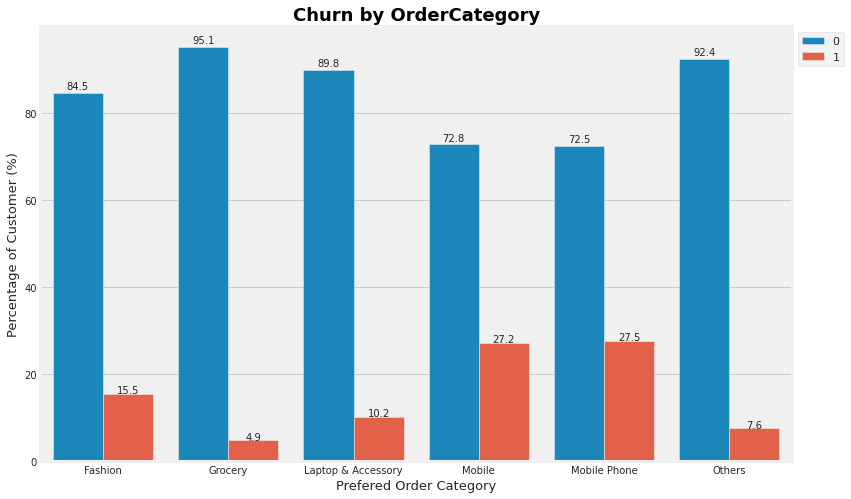

In [119]:
plt.figure(figsize=(12,8))
ax = sns.barplot(data=df12_new1, x='PreferedOrderCat', y='Ratio', hue='Churn')
plt.title('Churn by OrderCategory', color='black',fontsize=18,fontweight='bold')
plt.legend(loc='upper left',bbox_to_anchor=(1,1),ncol=1);
plt.xlabel('Prefered Order Category',fontsize=13);
plt.ylabel('Percentage of Customer (%)',fontsize=13)
plt.tick_params(axis = 'both', which = 'major', labelsize = 10)
show_values(ax)

**1. Insight :**

Fashion is an item that can be purchased every month, the churn rate should not be high

**Business Recommendation :**

Provide product offerings that are different from products that have been purchased by customers.

 **2. Insight :** 

Laptops & Accessories and Mobile are not included in items purchased every month

**Business Recommendation :**

For customers who have just bought electronic goods, cross-selling can be done by offering electronic accessories, such as keyboards, mice, etc.